# Biostat 257 Homework 1

#### Due Apr 16 @ 11:59PM

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

2. Create a **private** repository `biostat-257-2021-spring` and add `Hua-Zhou` and `Chris-German` (TA) as your collaborators.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in the `master` branch. 

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

5. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (4) four space indenting rule, (6) 80 charcter rule, (7) space after comma rule, (8) no space before comma rule, (9) space around operator rule.

### Answer

The style guide has been read. The following problems intend to follow the Julia style guide as closely as possible.

## Q2

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

4. Is `0 * x == 0` true for all floating-point number `x`? 

5. Is `x / a == x * (1 / a)` always true?

### Answer

#### Part 1

We test the association rule:

In [1]:
x, y, z = 0.1, 0.1, 1.0
(x + y) + z == x + (y + z)

false

Clearly they are unequal. We print out the numbers step-by-step to determine the reason:

In [2]:
x + y

0.2

In [3]:
(x + y) + z

1.2

In [4]:
y + z

1.1

In [5]:
x + (y + z)

1.2000000000000002

In [6]:
(x + (y + z)) - ((x + y) + z)

2.220446049250313e-16

In [7]:
(x + (y + z)) - ((x + y) + z) == eps(Float64)

true

The discrepancy in precision (with a difference equalling the smallest 64-bit floating point number) is due to the different representations of each, which results in different rounded values.

#### Part 2

In [8]:
x, y, z = 2.0^30 + 1.0, 2.0^30 + 1.0, 2.0^30 + 2.0^6 + 1.0

(1.073741825e9, 1.073741825e9, 1.073741889e9)

In [9]:
(x * y) * z == x * (y * z)

false

Counterexample provided in the following webpage: https://stackoverflow.com/questions/43956397/associativity-of-floating-point-multiplication-in-a-special-case

#### Part 3

In [10]:
a, x, y = exp(1.0), pi, sin(1.0)

(2.718281828459045, π, 0.8414709848078965)

In [11]:
a * (x + y) == a * x + a * y

false

Counterexample provided on the following webpage: https://www.mathworks.com/matlabcentral/answers/120722-i-don-t-understand-the-why-the-distributive-property-in-math-is-not-always-true-in-matlab

#### Part 4

In [12]:
x = Inf

Inf

In [13]:
0 * x == 0

false

It is refreshing to see that what holds true in math also holds true in computation in this case. Note that in this case that Inf is a floating point number:

In [14]:
typeof(x)

Float64

In [15]:
typeof(Inf)

Float64

#### Part 5

In [16]:
x, a = 2.0^30 + 1.0, 3.0

(1.073741825e9, 3.0)

In [17]:
x / a == x * (1 / a)

false

## Q3

Consider Julia function
```julia
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
```
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
3. Compare the bitcode from questions 1 and 2. What do you find?  
4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
    Explain what does macro `@fastmath` do?

### Answer

In [18]:
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end

g (generic function with 1 method)

In [19]:
@code_llvm g(Int64(1))

;  @ In[18]:1 within `g`
define i64 @julia_g_1559(i64 signext %0) #0 {
top:
;  @ In[18]:3 within `g`
; ┌ @ int.jl:88 within `*`
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:86 within `-`
   %2 = add i64 %1, -2441406
; └
;  @ In[18]:5 within `g`
  ret i64 %2
}


In [20]:
@code_llvm g(Float64(1.0))

;  @ In[18]:1 within `g`
define double @julia_g_1591(double %0) #0 {
top:
;  @ In[18]:3 within `g`
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %8 = fadd double %7, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %9 = fmul double %8, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %10 = fadd double %9, -1.000000e+00

The first thing to notice about bitcode of g compiled with the Int64 format is that it is much shorter than the bitcode of g compiled with the Float64 format. Indeed, the bitcode of g lists two operations: multiplication of the argument by 5^10 = 9765625, and subtraction by 2441406 (more precisely, addition by -2441406). This shows that the Int64-compiled g has been simplified to a single integer multiplication and addition operation, as the following integer computations show:

In [21]:
5^10

9765625

In [22]:
x = 0
for i in 1:10
    x -= 5^(i - 1)
end
x

-2441406

-2441406, in particular, is the result of the successive subtractions of k at each iteration of g(k), post-multiplication by 5 at each step. This is a result of code_llvm's optimization.

By contrast, the Float64-compiled g multiplies the argument k by 5 and subtracts by 1.0 (adds by -1.0) at each step, despite doing so both being less efficient computationally and more prone to error at each step.

We repeat the above steps with the @fastmath macro applied:

In [23]:
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

In [24]:
@code_llvm g_fastmath(Int64(1))

;  @ In[23]:1 within `g_fastmath`
define i64 @julia_g_fastmath_1677(i64 signext %0) #0 {
top:
;  @ In[23]:3 within `g_fastmath`
; ┌ @ fastmath.jl:270 within `mul_fast`
; │┌ @ int.jl:88 within `*`
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:270 within `sub_fast`
; │┌ @ int.jl:86 within `-`
    %2 = add i64 %1, -2441406
; └└
;  @ In[23]:5 within `g_fastmath`
  ret i64 %2
}


In [25]:
@code_llvm g_fastmath(Float64(1.0))

;  @ In[23]:1 within `g_fastmath`
define double @julia_g_fastmath_1679(double %0) #0 {
top:
;  @ In[23]:3 within `g_fastmath`
; ┌ @ fastmath.jl:267 within `mul_fast` @ fastmath.jl:167
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:267 within `sub_fast` @ fastmath.jl:166
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ In[23]:5 within `g_fastmath`
  ret double %2
}


In [26]:
g_fastmath(Int64(1))

7324219

In [27]:
g_fastmath(Float64(1.0))

7.324219e6

We see that the @fastmath macro has simplified the g_fastmath function compiled with the Float64 argument to two steps, like g with the Int64 argument. @fastmath simplifies the operations to mathematically equivalent forms; some of its optimizations break the rules of the IEEE 754 standard. The optimizations may be divided into some specific optimizations, such as those that assume NaN's and Inf's will not be passed into the function, or others that may reduce accuracy such as assuming the associative property of addition and multiplication may hold.

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.   

1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.  

2. Plot the polynomial `y = (x - 1)^7` at points `x`.  

3. Explain what you found.

### Answer

In [28]:
x = collect(0.988:0.001:1.012)

25-element Vector{Float64}:
 0.988
 0.989
 0.99
 0.991
 0.992
 0.993
 0.994
 0.995
 0.996
 0.997
 0.998
 0.999
 1.0
 1.001
 1.002
 1.003
 1.004
 1.005
 1.006
 1.007
 1.008
 1.009
 1.01
 1.011
 1.012

In [29]:
function y1(x::Float64)
    x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1
end

y1 (generic function with 1 method)

In [30]:
function y2(x::Float64)
    (x - 1)^7
end

y2 (generic function with 1 method)

In [31]:
y1s = map(x -> y1(x), x)
y2s = map(x -> y2(x), x)

25-element Vector{Float64}:
 -3.583180800000022e-14
 -1.9487171000000122e-14
 -1.0000000000000062e-14
 -4.78296900000003e-15
 -2.0971520000000132e-15
 -8.235430000000051e-16
 -2.7993600000000173e-16
 -7.812500000000048e-17
 -1.6384000000000103e-17
 -2.1870000000000135e-18
 -1.280000000000008e-19
 -1.0000000000000063e-21
  0.0
  9.99999999999229e-22
  1.280000000000008e-19
  2.186999999999447e-18
  1.6384000000000103e-17
  7.812499999998834e-17
  2.7993600000000173e-16
  8.235429999999137e-16
  2.0971520000000132e-15
  4.7829689999996165e-15
  1.0000000000000062e-14
  1.9487170999998743e-14
  3.583180800000022e-14

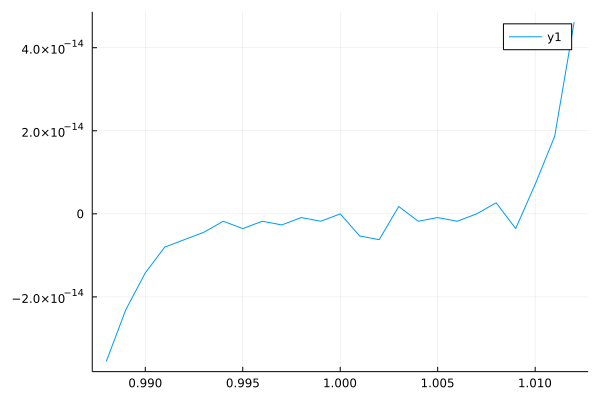

In [32]:
using Plots

plot(x, y1s)

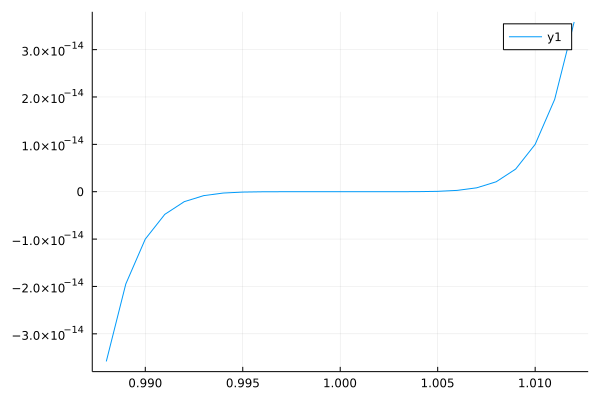

In [33]:
plot(x, y2s)

Plotting y1 shows a plot that is jagged and not smooth, as a result of adding several floating point numbers together to compute each result, with the roundoff error aggregating at each floating point addition. Plotting y2 is noticeably smoother due to a single subtraction and a single exponentiation taking place.

Mathematically, suppose each value $x$ is represented by a floating number $x'$, which differs from $x$ by some maximal error $\epsilon$, so that $\lvert x - x'\rvert \leq \epsilon$ at each value we compute. Then $x = x' \pm \epsilon$ and the aggregate error for y2 would be:

$$
(x' - 1)^7 = (x - 1 \pm \epsilon)^7 = (x - 1)^7 \pm 7(x - 1)^6\epsilon + 14(x - 1)^5 \epsilon^2 \pm 35(x - 1)^4 \epsilon^3 + 35(x - 1)^3 \epsilon^4 \pm 14(x - 1)^2 \epsilon^5 + 7(x - 1)^1 \epsilon^6 \pm \epsilon^7 = (x - 1)^7 \pm 7O(\epsilon)
$$

Note that we move the 7 outside of the big-O in order to emphasize its impact on the error, the other constant term multiplying the $\epsilon$ consists of the difference term $(x - 1)^k$ for some power $k$, as well as higher powers of $\epsilon$, which we treat as negligible terms, owing to the differences in order of magnitude (i.e., $\lvert x - 1\rvert \approx 0.012$ at most, while $\epsilon \approx 10^{-16}$ for a 64-bit floating point number).

With the same approach, we compute y1:

\begin{align*}
&(x \pm \epsilon)^7 - 7(x \pm \epsilon)^6 + 14(x \pm \epsilon)^5 - 35(x \pm \epsilon)^4 + 35(x \pm \epsilon)^3 - 14(x \pm \epsilon)^2 + 7(x \pm \epsilon) - 1\\
&= x^7 \pm 7O(\epsilon) - 7x^6 \mp 42O(\epsilon) + 14x^5 \pm 90O(\epsilon) - 35x^4 \mp 140O(\epsilon) + 35x^3 \pm 105O(\epsilon) - 14x'^2 \mp 70O(\epsilon) + 7x' \pm 42O(\epsilon) - 1\\
 &= (x - 1)^7 \pm 496O(\epsilon)
\end{align*}

in the worst case aggregation of the error term. Indeed, if we take the values of y2 to be sufficiently close to the true values, we can compute the relative errors at each point and end up with some even more startling errors especially for values closer to $x = 1$, some orders of magnitude beyond the above worst case aggregated error term:

In [34]:
(y1s - y2s) ./ y2s

25-element Vector{Float64}:
     -0.008502814370829673
      0.18501751291673438
      0.42108547152019166
      0.6712643919082639
      1.9646153153900328
      4.392422858916412
      5.34558198802669
     44.474735088646135
    107.42021724854976
   1217.3517417011246
   6937.893903907185
      1.7763558394002393e6
    NaN
     -5.32907151820486e6
 -48573.25732735029
    811.2344944676267
   -109.42021724854976
    -12.368683772163301
     -7.345581988026691
     -1.0
      0.2705494208814425
     -1.7427841741815149
     -0.2894572642399042
     -0.04287047033641605
      0.2889463413179214

The NaN value may be ignored, as $x = 1$ returns a value of $y = 0$ for both implementations of y1 and y2.

## Q5

1. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

2. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

3. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

4. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Hint**: 1 and 2 are special cases of 3.

### Answer

#### Part 1

The Sherman-Morrison formula may be shown by simply computing the product (this is the same approach taken by Seber and Lee, 2nd Edition):

\begin{align*}
&(A + uu^{T})\left(A^{-1} - \frac{1}{1 + u^{T}A^{-1}u}A^{-1}uu^{T}A^{-1}\right)\\
 &= I_{n} + uu^{T}A^{-1} - \frac{1}{1 + u^{T}A^{-1}u}uu^{T}A^{-1} - \frac{1}{1 + u^{T}A^{-1}u}uu^{T}A^{-1}uu^{T}A^{-1}\\
 &= I_{n} + uu^{T}A^{-1} - \frac{1}{1 + u^{T}A^{-1}u}uu^{T}A^{-1} - \frac{u^{T}A^{-1}u}{1 + u^{T}A^{-1}u}uu^{T}A^{-1}\\
 &= I_{n} + uu^{T}A^{-1} - \frac{1 + u^{T}A^{-1}u}{1 + u^{T}A^{-1}u}uu^{T}A^{-1} = I_{n}\\
\end{align*}

#### Part 2

We do the same for the Woodbury formula:

\begin{align*}
&(A + UV^{T})\left(A^{-1} - A^{-1}U(I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\right)\\
&= I_{n} + UV^{T}A^{-1} - U(I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1} - UV^{T}A^{-1}U(I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\\
&= I_{n} + UV^{T}A^{-1} - U(I_{m} + V^{T}A^{-1}U)(I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\\
&= I_{n} + UV^{T}A^{-1} - UV^{T}A^{-1} = I_{n}
\end{align*}

#### Part 3

Finally, we proceed to the binomial inversion formula, a.k.a. the Woodbury Matrix Identity, or the Sherman-Morrison-Woodbury formula:

\begin{align*}
&(A + UBV^{T})\left(A^{-1} - A^{-1}U(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\right)\\
&= I_{n} + UBV^{T}A^{-1} - U(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1} - UBV^{T}A^{-1}U(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\\
&= I_{n} + UBV^{T}A^{-1} - U(I_{m} + BV^{T}A^{-1}U)(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\\
&= I_{n} + UBV^{T}A^{-1} - UB(B^{-1} + V^{T}A^{-1}U)(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\\
&= I_{n} + UBV^{T}A^{-1} - UBV^{T}A^{-1} = I_{n}\\
\end{align*}

#### Part 4

Given the above three parts, we try to prove the following identity:

\begin{align*}
\mathrm{det}(A + UV^{T}) &= \mathrm{det}(A)\mathrm{det}(I_{m} + V^{T}A^{-1}U)
\end{align*}

We use the Woodbury formula:

\begin{align*}
&\mathrm{det}(A + UV^{T})\left(A^{-1} - A^{-1}U(I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\right) = 1\\
&= \mathrm{det}(A + UV^{T})\mathrm{det}\left(A^{-1} - A^{-1}U(I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\right)
\end{align*}

We focus on the term $\mathrm{det}\left(A^{-1} - A^{-1}U(I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\right)$:

\begin{align*}
&\mathrm{det}\left(A^{-1} - A^{-1}U(I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\right) = \mathrm{det}(A^{-1})\mathrm{det}\left(I_{n} - U(I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\right)
\end{align*}

Briefly, we turn aside to the Weinstein-Aronszajn identity: if $A \in \mathbb{R}^{n\times m}$ and $B \in \mathbb{R}^{m\times n}$, then $\mathrm{det}(I_{n} + AB) = \mathrm{det}(I_{m} + BA)$. We duplicate the proof from Wikipedia (https://en.wikipedia.org/wiki/Weinstein%E2%80%93Aronszajn_identity):

Begin with the following block matrix:

\begin{align*}
M = \begin{bmatrix}I_{m} & -A\\
B & I_{n}\end{bmatrix}
\end{align*}

Column reduction by block matrix multiplication gives us:

\begin{align*}
\begin{bmatrix}I_{m} & -A\\
B & I_{n}\end{bmatrix}\begin{bmatrix}I_{m} & 0\\
-B & I_{n}\end{bmatrix} &= \begin{bmatrix}I_{m} + AB & -A\\
0 & I_{n}
\end{bmatrix}
\end{align*}

Row reduction would give us:

\begin{align*}
\begin{bmatrix}I_{m} & A\\
0 & I_{n}\end{bmatrix}\begin{bmatrix}I_{m} + AB & -A\\
0 & I_{n}
\end{bmatrix} &= \begin{bmatrix}I_{m} + AB & 0\\
0 & I_{n}\end{bmatrix}
\end{align*}

Since the determinant of the column and row reduction operation matrices is 1, the determinant of $M$ is simply the row-reduced matrix, or $\mathrm{det}(I_{m} + AB)$.

We reverse the order of reduction operations on $M$ and reduce in the other direction; i.e. to achieve a lower-triangular matrix

\begin{align*}
\begin{bmatrix}I_{m} & 0\\
-B & I_{n}\end{bmatrix}\begin{bmatrix}I_{m} & -A\\
B & I_{n}\end{bmatrix} &= \begin{bmatrix}I_{m} & -A\\
0 & I_{n} + BA\end{bmatrix}
\end{align*}

Column reduction gives us:
\begin{align*}
\begin{bmatrix}I_{m} & -A\\
0 & I_{n} + BA\end{bmatrix}\begin{bmatrix}I_{m} & A\\
0 & I_{n}\end{bmatrix} &= \begin{bmatrix}I_{m} & 0\\
0 & I_{n} + BA\end{bmatrix}
\end{align*}

so that the determinant of $M$ is also $\mathrm{det}(I_{n} + BA)$. Hence, $\mathrm{det}(M) = \mathrm{det}(I_{m} + AB) = \mathrm{det}(I_{n} + BA)$, and the Weinstein-Aronszajn identity is proven.

We use the Weinstein-Aronszajn identity to simplify $\mathrm{det}\left(I_{n} - U(I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\right)$:

\begin{align*}
&\mathrm{det}\left(I_{n} - U(I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\right)\\
&= \mathrm{det}\left(I_{m} - (I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}U\right)\\
&= \mathrm{det}\left(I_{m} + (I_{m} + V^{T}A^{-1}U)^{-1} - (I_{m} + V^{T}A^{-1}U)^{-1} - (I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}U\right)\\
&= \mathrm{det}\left(I_{m} + (I_{m} + V^{T}A^{-1}U)^{-1} - (I_{m} + V^{T}A^{-1}U)^{-1}(I_{m} + V^{T}A^{-1}U)\right)\\
&= \mathrm{det}\left(I_{m} + (I_{m} + V^{T}A^{-1}U)^{-1} - I_{m}\right)\\
&= \mathrm{det}((I_{m} + V^{T}A^{-1}U)^{-1})
\end{align*}

Hence,

\begin{align*}
&\mathrm{det}(A + UV^{T})\mathrm{det}\left(A^{-1} - A^{-1}U(I_{m} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}\right)\\
&= \mathrm{det}(A + UV^{T})\mathrm{det}(A^{-1})\mathrm{det}((I_{m} + V^{T}A^{-1}U)^{-1}) = 1\\
\mathrm{det}(A + UV^{T}) &= \mathrm{det}(A^{-1})^{-1}\mathrm{det}((I_{m} + V^{T}A^{-1}U)^{-1})^{-1}\\
 &= \mathrm{det}(A)\mathrm{det}(I_{m} + V^{T}A^{-1}U)
\end{align*}

$\square$

## Q6

Demonstrate the following facts about triangular matrices in Julia (one example for each fact). Mathematically curious ones are also encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

5. An orthogonal upper (lower) triangular matrix is diagonal.

### Answer

We proceed to demonstrate the following parts by proving such statements:

#### Part 1

The product of two upper (lower) triangular matrices is upper (lower) triangular.

An example is supplied below for both upper and lower triangular matrices:

In [35]:
using Random, LinearAlgebra
Random.seed!(123)
n = 5
T = Float64
A = UpperTriangular(randn(T,(n,n)))
B = UpperTriangular(randn(T,(n,n)))
A * B

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.41465  -0.670474  -0.0619065  -2.51388     0.149012
  ⋅        0.122319  -0.264377   -0.29526     0.194798
  ⋅         ⋅         0.0299737  -0.0781009   0.0565113
  ⋅         ⋅          ⋅          0.10059    -1.14204
  ⋅         ⋅          ⋅           ⋅          0.524722

In [36]:
A = LowerTriangular(randn(T,(n,n)))
B = LowerTriangular(randn(T,(n,n)))
A * B

5×5 LowerTriangular{Float64, Matrix{Float64}}:
 -1.11402     ⋅          ⋅          ⋅          ⋅ 
  1.32811    0.615347    ⋅          ⋅          ⋅ 
 -0.23285    2.66032    0.0902688   ⋅          ⋅ 
 -0.200543  -1.21355   -1.62274    0.630603    ⋅ 
  1.90686   -0.513563  -0.678835   2.14582   -1.51082

**Proof**: An upper triangular matrix is defined as a square matrix $\{a_{ij}\}_{i,j = 1,\ldots,n}$ where $a_{ij} = 0$ if $j > i$. We may illustrate such a matrix $A \in \mathbb{R}^{n\times n}$ as follows:

\begin{align*}
A = \begin{bmatrix}a_{11} & a_{12} & \cdots & a_{1n}\\
        0 & a_{22} & \cdots & a_{2n}\\
        \vdots & \ddots & \ddots & \vdots\\
        0 & \cdots & 0 & a_{nn}\end{bmatrix}
\end{align*}

Take another upper-triangular matrix $B \in \mathbb{R}^{n\times n}$. We compute $[AB]_{ij}$ for $i > j$ as follows:

\begin{align*}
a_{i,:} &= \begin{bmatrix}0 & \cdots & 0 & a_{ii} & a_{i,i+1} & \cdots & a_{in}\end{bmatrix}\\
b_{:,j} &= \begin{bmatrix}b_{1j} & b_{2j} & \cdots & b_{jj} & 0 & \cdots & 0\end{bmatrix}\\
[AB]_{ij} &= a_{i,:}b_{:,j} = \sum_{k=1}^{n}a_{ik}b_{kj}
\end{align*}

But $a_{ik} = 0$ for $k < i$ and $b_{kj} = 0$ for $k > j$. Since $i > j$, $k \leq j$ implies $k < i$ and $k \geq i$ implies $k > j$. So $a_{ik} = 0$ or $b_{kj} = 0$ for all $k = 1,\ldots,n$ and $[AB]_{ij} = \sum_{k=1}^{n}a_{ik}b_{kj} = 0$. This shows that all entries below the diagonal for the product of two upper-triangular matrices is still 0, which proves that the product of two upper-triangular matrices is also upper-triangular.

For the product of two lower-triangular matrices, just take the transpose of the above case. Hence, $A^{T}$ and $B^{T}$ are lower triangular, and $B^{T}A^{T} = (AB)^{T}$ is also lower-triangular. $\square$

#### Part 2

The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

Examples in Julia are supplied below, followed by the proof:

In [37]:
Random.seed!(123)
n = 5
A = UpperTriangular(randn((n,n)))
inv(A)

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 1.23718   0.674132   54.7685   57.0564   118.207
  ⋅       -2.37097   -22.2964  -30.2502   -61.7595
  ⋅         ⋅        -32.1047  -34.4115   -69.4758
  ⋅         ⋅           ⋅       -3.13607   -5.847
  ⋅         ⋅           ⋅         ⋅        -0.918933

Alternatively, with an optimized LinearAlgebra function:

In [38]:
import LinearAlgebra: BlasReal
Ainv = Matrix{T}(I, n, n)
LAPACK.trtrs!('U', 'N', 'N', Matrix(A), Ainv)
Ainv

5×5 Matrix{Float64}:
  1.23718   0.674132   54.7685   57.0564   118.207
 -0.0      -2.37097   -22.2964  -30.2502   -61.7595
 -0.0      -0.0       -32.1047  -34.4115   -69.4758
 -0.0      -0.0        -0.0      -3.13607   -5.847
 -0.0      -0.0        -0.0      -0.0       -0.918933

Similarly with a lower triangular matrix:

In [39]:
A = LowerTriangular(randn((n,n)))
Ainv = Matrix{T}(I, n, n)
LAPACK.trtrs!('L', 'N', 'N', Matrix(A), Ainv)
Ainv

5×5 Matrix{Float64}:
  1.94932     0.0        0.0       0.0       0.0
  7.87546    -3.44811   -0.0      -0.0      -0.0
  0.393337   -0.444762  -1.03918  -0.0      -0.0
 45.4668    -12.6109     1.43421  -3.17     -0.0
 63.9102    -19.2004     3.16097  -4.35301  -2.07389

**Proof**: Let $A \in \mathbb{R}^{n \times n}$ be upper triangular. We compute the inverse of $A$ via bottom-to-top row reduction:

\begin{align*}
A &= \begin{bmatrix}a_{11} & a_{12} & \cdots & a_{1n}\\
        0 & a_{22} & \cdots & a_{2n}\\
        \vdots & \ddots & \ddots & \vdots\\
        0 & \cdots & 0 & a_{nn}\end{bmatrix}\\
A_{1}' = S_{1}A = \begin{bmatrix}1 & 0 & \cdots & 0\\
0 & 1 & \cdots & 0\\
\vdots & \ddots & \ddots & \vdots\\
0 & \cdots & 0 & \frac{1}{a_{nn}}\end{bmatrix}A &= \begin{bmatrix}a_{11} & a_{12} & \cdots & a_{1n}\\
        0 & a_{22} & \cdots & a_{2n}\\
        \vdots & \ddots & \ddots & \vdots\\
        0 & \cdots & 0 & 1\end{bmatrix}\\
A_{2}' = R_{1}A_{1}' = \begin{bmatrix}1 & 0 & \cdots & -a_{1n}\\
0 & 1 & \cdots & -a_{2n}\\
\vdots & \ddots & \ddots & \vdots\\
0 & \cdots & 0 & 1\end{bmatrix}A_{1}' &= \begin{bmatrix}a_{11} & a_{12} & \cdots & 0\\
        0 & a_{22} & \cdots & 0\\
        \vdots & \ddots & \ddots & \vdots\\
        0 & \cdots & 0 & 1\end{bmatrix}\\
\end{align*}

The above steps are successively repeated for the $(n - 1) \times (n - 1)$ submatrix of $A_{2}'$ to generate another column of the identity matrix. The product of such reduction matrices $R_{n}S_{n}\cdots R_{2}S_{2}R_{1}S_{1}$ is then the inverse $A^{-1}$. In each case the matrices multiplying $A$ to generate $I_{n}$, $R_{k}$ and $S_{k}$, are all upper triangular matrices. Per Part 1, the resulting product of upper triangular matrices is also an upper-triangular matrix. Hence, $A^{-1} = R_{n}S_{n}\cdots R_{2}S_{2}R_{1}S_{1}$ is also upper-triangular.

Note that if any of the diagonals $a_{ii} = 0$, then the above row-reduction algorithm would not work. In such a case, said algorithm would eventually yield a row of zeros, showing $A$ to be singular, contradicting the requirement that $A$ be nonsingular.

The proof for lower-triangular matrices may be duplicated by taking the transpose of the above matrices:

\begin{align*}
A^{-1,T} = A^{T,-1} &= S_{1}^{T}R_{1}^{T}\cdots S_{n}^{T}R_{n}
\end{align*}

which is a product of lower triangular matrices. Hence, the inverse of $A^{T}$, a lower triangular matrix $A^{T,-1}$, is also a lower triangular matrix.

$\square$

#### Part 3

We demonstrate again:

In [40]:
Random.seed!(123)
n = 5
T = Float64
A = UnitUpperTriangular(randn(T,(n,n)))
B = UnitUpperTriangular(randn(T,(n,n)))
A * B

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  -0.517221  2.59655   -4.0389     3.17827
  ⋅    1.0       0.251438  -0.0266581  1.92368
  ⋅     ⋅        1.0       -0.612265   1.38525
  ⋅     ⋅         ⋅         1.0        2.54238
  ⋅     ⋅         ⋅          ⋅         1.0

In [41]:
A = UnitLowerTriangular(randn(T,(n,n)))
B = UnitLowerTriangular(randn(T,(n,n)))
A * B

5×5 UnitLowerTriangular{Float64, Matrix{Float64}}:
  1.0         ⋅          ⋅         ⋅         ⋅ 
 -1.54332    1.0         ⋅         ⋅         ⋅ 
  2.5422    -1.9484     1.0        ⋅         ⋅ 
 -0.253127   1.3071     1.21166   1.0        ⋅ 
  0.326879  -0.418754  -0.290714  0.665763  1.0

**Proof**: We duplicate the proof for Part 1, except this time, we include the proof for the diagonal entries. For two upper triangular matrices $A$ and $B$, it is established that $[AB]_{ij} = 0$ for $i > j$. We next consider the case where the diagonals of $A$ and $B$ are 1, and aim to prove that the diagonals are also 1, i.e. for $i = j$:

\begin{align*}
[AB]_{ii} &= \sum_{k=1}^{n}a_{ik}b_{ki}
\end{align*}

As with Part 1, $a_{ik} = 0$ for $k < i$ and $b_{ki} = 0$ for $k > i$. Clearly then,

\begin{align*}
[AB]_{ii} &= a_{ii}b_{ii} = 1\times 1 = 1
\end{align*}

As before, the proof for the lower-diagonal case may be proven by taking the transposes of $A$, $B$, and computing $B^{T}A^{T} = (AB)^{T}$ as above. $\square$

#### Part 4

The code examples follow:

In [42]:
Random.seed!(123)
n = 5
T = Float64
A = UnitUpperTriangular(randn(T,(n,n)))
Ainv = Matrix{T}(I, n, n)
LAPACK.trtrs!('U', 'N', 'N', Matrix(A), Ainv)
Ainv

5×5 Matrix{Float64}:
 1.0  -0.229819  -1.15196    1.48012   -4.62768
 0.0   1.0       -0.292914  -0.75413    0.817831
 0.0   0.0        1.0       -0.341782   0.513192
 0.0   0.0        0.0        1.0       -2.02891
 0.0   0.0        0.0        0.0        1.0

In [43]:
A = UnitLowerTriangular(randn(T,(n,n)))
Ainv = Matrix{T}(I, n, n)
LAPACK.trtrs!('L', 'N', 'N', Matrix(A), Ainv)
Ainv

5×5 Matrix{Float64}:
  1.0        0.0       0.0        0.0       0.0
 -1.17169    1.0       0.0        0.0       0.0
  0.452734  -0.124124  1.0        0.0       0.0
 -0.94292   -1.26393   0.435373   1.0       0.0
  2.1423     0.433594  0.264599  -0.662131  1.0

We duplicate the steps in Part 2 without the inverse scaling matrices, since the diagonals of the matrix under consideration are all $1$. Indeed, row reduction would proceed as before:

\begin{align*}
A &= \begin{bmatrix}1 & a_{12} & \cdots & a_{1,n-1} & a_{1n}\\
        0 & 1 & \cdots & a_{2,n-1} & a_{2n}\\
        0 & 0 & 1 & \cdots & a_{3n}\\
        \vdots & \ddots & \ddots & \ddots & \vdots\\
        0 & \cdots & 0 & 0 & 1\end{bmatrix}\\
A_{1}' = R_{1}A_{1} &= \begin{bmatrix}1 & 0 & \cdots & 0 & -a_{1n}\\
0 & 1 & \cdots & 0 & -a_{2n}\\
0 & 0 & 1 & \cdots & -a_{3n}\\
\vdots & \ddots & \ddots & \ddots & \vdots\\
0 & \cdots & 0 & 0 & 1\end{bmatrix}A_{1} = \begin{bmatrix}1 & a_{12} & \cdots & a_{1,n-1} & 0\\
        0 & 1 & \cdots & a_{2,n-1} & 0\\
        0 & 0 & 1 & \cdots & 0\\
        \vdots & \ddots & \ddots & \ddots & \vdots\\
        0 & \cdots & 0 & 0 & 1\end{bmatrix}\\
A_{2}' = R_{2}A_{1}' &= \begin{bmatrix}1 & 0 & \cdots & -a_{1,n-1} & 0\\
0 & 1 & \cdots & -a_{2,n-1} & 0\\
0 & 0 & 1 & \cdots & 0\\
\vdots & \ddots & \ddots & \ddots & \vdots\\
0 & \cdots & 0 & 0 & 1\end{bmatrix}A_{1} = \begin{bmatrix}1 & a_{12} & \cdots & 0 & 0\\
        0 & 1 & \cdots & 0 & 0\\
        0 & 0 & 1 & \cdots & 0\\
        \vdots & \ddots & \ddots & \ddots & \vdots\\
        0 & \cdots & 0 & 0 & 1\end{bmatrix}\\
\end{align*}

Reduction proceeds as for Part 2. Since each of the $R_{k}$ are unit upper triangular matrices, so is their product $R_{n}\cdots R_{1} = A^{-1}$. Hence, the inverse of unit upper triangular matrices is also unit upper triangular.

The proof for lower triangular matrices, as in the previous parts, may be acquired by taking the transpose of the above matrix products. Thus, $R_{1}^{T}\cdots R_{n}^{T} = A^{T,-1}$ is lower triangular, as is $A^{T}$. $\square$

#### Part 5

An orthogonal upper (lower) triangular matrix is diagonal.

A code example follows:

In [44]:
A = Diagonal([1, -1, 1, 1, -1])
A * transpose(A)

5×5 Diagonal{Int64, Vector{Int64}}:
 1  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  1

**Proof**: Assume $A \in \mathbb{C}^{n}$ is orhtogonal upper triangular. Then $A^{T}A = I_{n}$. Since $A^{T} = A^{-1}$, if $A$ is upper triangular, so much $A^{T}$. But since $A^{-1} = A^{T}$, $A^{-1}$ must also be lower triangular. Then $A$ must be lower triangular also. Hence, $A$ is diagonal.

The proof follows analogously if we begin with $A$ as a lower triangular matrix, and then conclude from $A^{T} = A^{-1}$ that $A$ is also upper triangular and hence diagonal. $\square$

#### Part 6

The product of two orthogonal matrices is orthogonal.

A code example follows:

In [45]:
Random.seed!(123)
n = 5
A = randn((n, n))
B = randn((n,n))
QA, _ = qr(A)
QB, _ = qr(B)

QA * QB * transpose(QA * QB)

5×5 Matrix{Float64}:
  1.0          -2.92688e-16   9.26352e-17   9.94723e-17   1.96329e-16
 -2.92688e-16   1.0           4.16631e-16  -2.0422e-16   -4.06018e-17
  9.26352e-17   4.16631e-16   1.0           1.25344e-16  -3.28403e-16
  9.94723e-17  -2.0422e-16    1.25344e-16   1.0          -1.30698e-17
  1.96329e-16  -4.06018e-17  -3.28403e-16  -1.30698e-17   1.0

It should be noted that off-diagonal numbers in the resulting matrix are not exactly zero, but are very close to zero owing to numerical error. In many applications, they would be sufficiently close to zero.

**Proof**: Let $Q_{A}$ and $Q_{B}$ be two orthogonal matrices. Then,

\begin{align*}
Q_{A}Q_{B}(Q_{A}Q_{B})^{T} &= Q_{A}Q_{B}Q_{B}^{T}Q_{A}^{T}\\
 &= Q_{A}Q_{A}^{T} = I
\end{align*}

$\square$